In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
 

In [7]:
df=pd.read_csv('Reviews.csv',error_bad_lines=False, engine="python")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


The analysis of this data will be done only with help of three columns i.e. Text , Score and Summary 

In [13]:
df.Text.head(3)

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
Name: Text, dtype: object

In [11]:
df.Summary.head(3)

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
Name: Summary, dtype: object

In [12]:
df.Score.head(3)

0    5
1    1
2    4
Name: Score, dtype: int64

Lets see the total number of reviews according to the ratings 


In [14]:
df.Score.value_counts()

5    5118
4    1155
1     749
3     690
2     475
Name: Score, dtype: int64

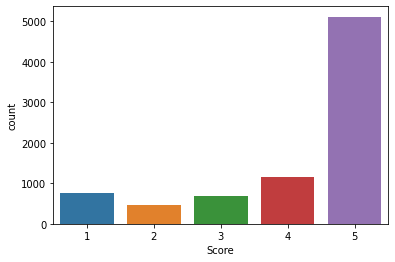

In [42]:
import seaborn as sns
sns.countplot(data = df,x = 'Score')

**Lets see the wordcloud**

In [43]:
! pip install wordcloud

In [44]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS


In [45]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [46]:
reviews = df
reviews.dropna(inplace=True)

In [47]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [48]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

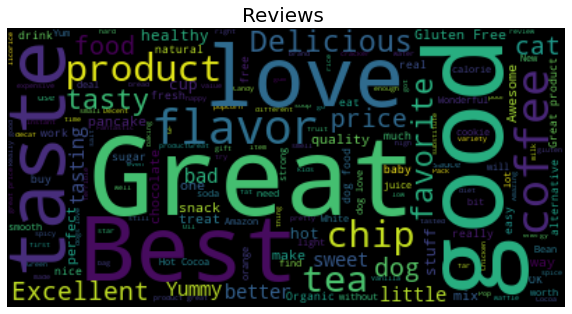

In [54]:
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='black').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Reviews ',fontsize=20)
plt.show()

Now lets split the data into Negetive and Positive Reviews 

Negetive Reviews  : Score ( 1-2)
Positive Reviews : ( 4-5)
Neutral : 3 ( Dropped)

In [58]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
negative_reviews.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
1,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...


In [59]:
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]
positive_reviews.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1914,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
1915,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...


Summary of Negetive Reviews


In [62]:
negative_reviews_str = negative_reviews.Summary.str.cat()
negative_reviews_str

'Not as AdvertisedMy Cats Are Not Fans of the New FoodNasty No flavorDon\'t like itstale product.Warning!  WARNING!  -ALCOHOL SUGARS!No Tea FlavorBadRip off PriceTasteless but low calorieVery Low qualityNot Banana RuntsThese just don\'t do it for me as breath mintsCHANGED FORMULA MAKES CATS SICK!!!!Price cannot be correctNot GoodFurniture Polish TasteSad outcomeDon\'t Waste Your MoneyReeks like chemicalsLie!!!!Over priced chips and lack rice tasteSo awful I can barely describeVery Dissapointedwhat quantity is it!Never ArrivedAWFULDoes not taste very goodNo noBitterWaste of moneyMSG Ham Basepoor item packagingAwfuldisappointingLook elsewhere for your whole grainsMaybe the worst chips ever.Surprise 1  It\'s different...I have had better "Jalapeno Kettle Chips"They changed the Chips now they taste horribleGone down hillcompletely ripped offSTALE.  Beware buying these on special!USED to be my favorite chipsStale, Rancid Oil Taste, And if You Like Even the Tiniest Bit of Salt Flavor on Your

Summary of Positive Reviews

In [63]:
positive_reviews_str = positive_reviews.Summary.str.cat()
positive_reviews_str

'"Delight" says it allNice Taffyfresh and greasy!Great Bargain for the PriceBest of the Instant OatmealsGood InstantsatisfyingGOOD WAY TO START THE DAY....Very good but next time I won\'t order the Variety PackYou\'ll go nuts over Ass-Kickin\' Peanuts.Roasts up a smooth brewGreatGreat SupportTART!Tastes great. Love Hot & Spicy. Bad price here.Tastes great, but is cheaper locally.Nice snackGood Licoricetastes goodNot BadGreat but not as good as it was back in the day as a teenReaLemon Juice from Amazon.relaxing, almost like something you smokeNever paid that much !not bad for instant healthy coffeeNice little mints, but pricey.A huge hit at the office!Best by the caseDELICIOUSHigh Quality... But it gave my dog wicked gas..This is what you get in the storeAhmad TeaBest Energy Shot For MeIt\'s sugar..Excellent but not perfectGood productGreat product - weak packagingThis stuff works!!!could use only onceShipped greatgreat for eating whole foods, clean with veggie brushLove the Fresh Food 

Wordcloud of Negetive Reviews 

Text(0.5, 1.0, 'Reviews with Negative Scores')

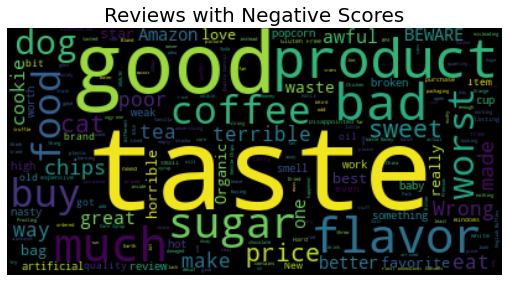

In [66]:
negative_cloud = WordCloud(background_color='black').generate(negative_reviews_str)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(negative_cloud,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

Wordcloud of Positive Reviews

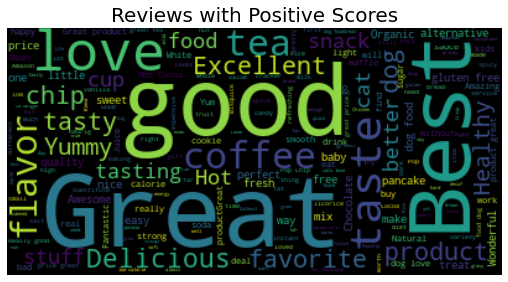

In [67]:
positive_cloud = WordCloud(background_color='black').generate(positive_reviews_str)
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(positive_cloud,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [72]:
! pip install vaderSentiment

     |████████████████████████████████| 133kB 12.4MB/s 


In [73]:
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Creating Numerical Values : Sentiment for all the sentence

In [74]:
emptyline=[]
for word in df['Text']:
    
    vs=analyzer.polarity_scores(word)
    emptyline.append(vs)

Creating the seperate data frame with numeric value of Negative neutral and Positive reviews 

In [75]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.711,0.289,0.9441
1,0.138,0.862,0.000,-0.5664
2,0.085,0.771,0.144,0.8138
3,0.000,0.932,0.068,0.4404
4,0.000,0.599,0.401,0.9468


Old data frame with these numerical values

In [76]:
df_new = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_new.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,sentimentt,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,positive,0.000,0.711,0.289,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1,negative,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,positive,0.085,0.771,0.144,0.8138


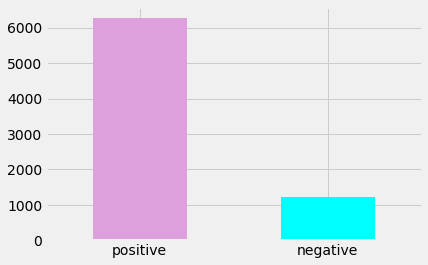

In [79]:
result=df_new['sentimentt'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);